<a href="https://colab.research.google.com/github/deleonja/comp-phys/blob/master/Clase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Listas y ciclos II**
Instructor: José Alfredo de León

Fecha: 01.12.2020

## **Esquema de la clase**

1.   Analizando datos de una lista.
2.   Integración numérica: el método del trapecio




## **Analizando datos de una lista**

El [archivo de datos](https://github.com/hplgit/scipro-primer/blob/master/src/misc/Oxford_sun_hours.txt) contiene datos del número de horas de sol en Oxford, Reino Unido, de cada mes desde enero de 1929 hasta 2009. Los datos se encuentran en el siguiente formato:



```
[
[43.8, 60.5, 190.2, 144.7, 240.9, 210.3, 219.7, 176.3, 199.1, 109.2, 78.7, 67.0],
[49.9, 54.3, 109.7, 102.0, 134.5, 211.2, 174.1, 207.5, 108.2, 113.5, 68.7, 23.3],
[63.7, 72.0, 142.3, 93.5, 150.1, 158.7, 127.9, 135.5, 92.3, 102.5, 62.4, 38.5],
...
]
```
Cada lista anidada corresponde a un año de datos, y en cada lista cada entrada es la información de las horas de sol en el mes.


Utilice un programa para:

A. Calcular el promedio del número de horas de sol para cada mes durante todo el período de los datos.

B. ¿Qué mes tuvo el mejor clima de acuerdo con los promedios encontrados en el ejercicio anterior?

C. Para cada década calcule el promedio de número de horas de sol por día en enero y diciembre. ¿Existen diferencias sustanciales entre las décadas?

**¿Por qué usar programación para resolver problemas como estos?**


* son muchos datos como para hacer estos cálculos a mano
* el procedimiento es repetitivo y qué pereza hacerlo a mano si una computadora puede hacerlo por mí.
* no voy a aprender nada nuevo repitiendo una y otra vez el procedimiento a mano.

... es práctico usar la programación a nuestro favor :D



### **Inciso A**

Calcular el promedio del número de horas de sol para cada mes durante todo el período de los datos.

Algoritmo A. Entrada: datos brutos. Salida: promedio de horas para cada mes.

1. Crear un arreglo de datos para guardar los promedio mensuales.
2. Para cada mes:
  
  a. Sumar las horas de sol del mismo mes para todos los años -> hoursSum

  b. Calcular el promedio -> hours_sum / número de años

  c. Añadir al arreglo del paso 1 el promedio para dicho mes
3. **(opcional)** Imprimir los promedios, por ej. en la salida estándar (terminal) 

El paso 3 es opcional porque para fines prácticos de la resolución del inciso no aporta nada, más que estética al problema. Es importante evaluar cuándo y cuándo no es necesario agregar esto último. A veces podría quitar tiempo para lo importante.

#### **Código:**

In [10]:
# Se guardan los datos en un arreglo de datos
data = [
[43.8, 60.5, 190.2, 144.7, 240.9, 210.3, 219.7, 176.3, 199.1, 109.2, 78.7, 67.0],
[49.9, 54.3, 109.7, 102.0, 134.5, 211.2, 174.1, 207.5, 108.2, 113.5, 68.7, 23.3],
[63.7, 72.0, 142.3, 93.5, 150.1, 158.7, 127.9, 135.5, 92.3, 102.5, 62.4, 38.5],
[51.0, 57.9, 133.4, 110.9, 112.4, 199.3, 124.0, 178.3, 102.1, 100.7, 55.7, 58.0],
[69.5, 94.3, 187.6, 152.5, 170.2, 226.9, 237.6, 242.7, 177.3, 101.3, 53.9, 59.0],
[65.9, 96.6, 122.5, 124.9, 216.3, 192.7, 269.3, 184.9, 149.1, 81.5, 48.7, 31.3],
[48.1, 62.0, 121.5, 127.3, 188.5, 196.3, 274.3, 199.9, 144.7, 102.6, 65.4, 48.9],
[43.4, 89.2, 71.4, 133.2, 179.5, 166.2, 119.2, 184.7, 79.3, 103.1, 48.9, 62.3],
[50.9, 66.6, 99.7, 103.1, 185.0, 181.3, 140.1, 202.3, 143.0, 79.1, 65.9, 41.2],
[41.2, 66.9, 172.3, 180.9, 144.9, 190.6, 133.5, 151.3, 110.9, 118.1, 70.0, 52.4],
[46.4, 104.9, 86.2, 171.7, 184.9, 227.9, 139.7, 153.7, 147.0, 94.3, 41.1, 46.0],
[83.1, 22.8, 128.3, 118.1, 215.4, 273.4, 165.1, 199.5, 179.5, 95.5, 76.8, 46.5],
[41.7, 67.9, 118.7, 106.9, 141.9, 210.3, 227.5, 163.7, 123.7, 120.2, 47.1, 46.9],
[45.1, 53.9, 69.4, 202.5, 209.4, 234.0, 150.1, 132.7, 124.5, 84.6, 57.8, 51.0],
[54.7, 79.3, 132.9, 166.6, 244.1, 192.9, 196.7, 178.3, 142.5, 84.9, 72.3, 49.5],
[41.2, 62.4, 142.7, 147.0, 235.6, 170.3, 97.5, 185.2, 143.8, 102.0, 49.3, 64.1],
[51.5, 65.7, 152.6, 209.1, 156.1, 182.4, 159.0, 144.8, 64.9, 111.7, 31.0, 46.6],
[49.9, 78.7, 107.2, 203.3, 162.9, 149.8, 197.6, 134.8, 98.5, 79.3, 42.9, 74.7],
[59.5, 26.3, 70.9, 150.5, 147.3, 185.9, 144.5, 274.9, 159.9, 107.3, 75.4, 37.9],
[45.7, 92.9, 160.2, 205.2, 237.1, 124.2, 174.7, 133.7, 146.4, 93.7, 68.6, 65.4],
[51.0, 115.1, 112.5, 182.5, 233.3, 242.1, 262.5, 210.3, 151.1, 125.0, 76.2, 65.4],
[40.6, 67.5, 138.8, 163.7, 174.1, 244.5, 174.0, 171.1, 112.7, 96.6, 56.9, 55.3],
[48.9, 58.6, 92.6, 200.4, 152.1, 251.9, 216.7, 174.7, 110.8, 105.6, 75.1, 69.8],
[94.1, 96.7, 105.0, 178.2, 207.0, 217.6, 194.0, 180.5, 140.3, 105.0, 72.1, 77.7],
[42.5, 75.9, 140.7, 183.3, 223.0, 139.7, 203.4, 237.4, 151.7, 84.1, 54.4, 28.4],
[75.7, 79.7, 107.9, 202.4, 145.9, 157.1, 157.1, 123.5, 168.8, 94.5, 60.1, 54.5],
[40.1, 86.3, 161.4, 173.7, 217.5, 155.3, 268.3, 188.0, 153.1, 119.7, 71.5, 47.3],
[50.3, 78.9, 149.7, 158.7, 246.6, 145.0, 168.0, 161.4, 94.3, 116.5, 77.9, 18.2],
[50.8, 83.1, 110.2, 168.0, 205.6, 297.1, 157.9, 170.5, 102.6, 92.9, 76.4, 62.3],
[54.6, 55.4, 110.7, 145.2, 196.0, 145.7, 188.1, 119.6, 118.0, 93.7, 51.8, 29.5],
[85.8, 65.5, 102.0, 153.8, 228.0, 226.3, 272.7, 245.6, 213.9, 144.2, 70.6, 45.0],
[37.8, 82.3, 78.0, 164.9, 182.3, 274.9, 129.7, 147.1, 122.8, 60.9, 73.4, 54.5],
[43.6, 65.1, 173.2, 86.9, 225.2, 231.2, 196.5, 185.7, 135.8, 118.2, 63.4, 76.5],
[70.0, 70.6, 126.3, 143.3, 177.5, 280.3, 137.3, 154.5, 142.3, 108.8, 32.7, 72.6],
[58.9, 66.4, 85.8, 119.1, 193.4, 199.4, 188.2, 142.6, 129.7, 78.8, 60.4, 49.8],
[37.2, 57.3, 65.9, 128.5, 190.8, 156.1, 214.7, 217.7, 210.4, 134.5, 55.0, 51.1],
[83.7, 31.1, 137.7, 141.6, 179.6, 188.7, 122.8, 181.2, 122.9, 109.9, 77.4, 71.9],
[42.5, 41.5, 121.5, 81.5, 234.9, 199.0, 149.7, 188.6, 168.0, 90.4, 61.0, 41.7],
[64.2, 88.2, 174.6, 130.8, 184.2, 232.0, 234.4, 167.1, 116.5, 95.1, 69.2, 70.6],
[50.0, 54.0, 148.5, 184.5, 155.0, 206.6, 136.2, 124.0, 114.9, 66.5, 47.9, 35.9],
[40.0, 78.1, 70.5, 221.3, 161.9, 276.9, 243.8, 157.5, 97.4, 112.0, 84.6, 35.6],
[34.5, 115.9, 120.8, 132.7, 224.8, 270.9, 192.4, 185.6, 157.3, 106.2, 64.7, 43.8],
[42.1, 69.5, 106.0, 122.9, 228.9, 143.5, 259.3, 134.2, 166.5, 135.2, 102.0, 29.8],
[41.8, 27.3, 144.0, 117.6, 141.9, 150.4, 168.7, 160.9, 129.1, 91.6, 80.6, 47.6],
[38.8, 74.1, 150.7, 167.7, 168.0, 249.5, 171.1, 192.0, 153.9, 95.1, 89.1, 62.9],
[56.3, 58.3, 101.7, 142.1, 191.4, 206.2, 187.8, 198.7, 146.5, 105.4, 52.9, 58.8],
[44.7, 57.8, 72.7, 131.4, 159.1, 301.0, 242.4, 218.6, 147.0, 120.7, 85.1, 34.4],
[70.3, 42.6, 107.8, 148.7, 172.0, 261.4, 254.2, 257.4, 118.2, 43.6, 54.1, 58.6],
[35.4, 74.4, 87.2, 157.9, 217.5, 123.2, 193.6, 123.4, 101.8, 107.3, 102.4, 45.2],
[53.6, 58.9, 128.1, 113.6, 202.8, 171.7, 146.4, 157.4, 159.3, 87.5, 77.3, 34.3],
[72.0, 67.3, 92.9, 126.4, 190.9, 166.6, 192.2, 167.4, 171.0, 117.0, 70.0, 59.7],
[84.0, 58.8, 86.7, 165.4, 228.7, 186.7, 168.9, 169.0, 136.4, 111.8, 61.4, 64.4],
[50.9, 75.3, 57.8, 110.4, 98.3, 122.8, 129.0, 199.8, 157.3, 101.9, 43.7, 57.5],
[55.0, 33.8, 144.7, 164.4, 187.2, 148.4, 151.4, 159.8, 141.0, 66.3, 68.5, 60.4],
[54.9, 74.0, 89.5, 150.5, 126.8, 180.3, 257.5, 214.5, 92.4, 119.7, 44.3, 62.9],
[86.1, 66.0, 48.8, 236.8, 143.4, 244.3, 249.4, 199.8, 99.6, 88.6, 53.8, 57.6],
[51.1, 78.0, 112.4, 138.3, 178.3, 165.0, 216.0, 164.9, 143.3, 100.8, 86.1, 44.2],
[76.4, 71.2, 127.3, 139.6, 205.6, 222.7, 201.2, 147.0, 171.6, 119.7, 77.9, 64.8],
[68.8, 67.8, 111.6, 158.7, 168.7, 129.3, 179.4, 158.2, 132.3, 109.5, 43.9, 42.9],
[47.7, 103.7, 85.2, 132.0, 178.1, 142.3, 138.8, 178.8, 136.9, 120.0, 91.4, 46.7],
[68.2, 107.0, 100.9, 133.9, 300.8, 244.4, 280.4, 269.5, 141.6, 90.8, 104.1, 26.5],
[58.3, 95.7, 144.1, 234.4, 285.0, 121.1, 268.5, 236.6, 164.7, 124.4, 83.7, 58.8],
[66.9, 60.0, 87.2, 156.6, 142.9, 150.0, 217.3, 241.4, 165.4, 79.4, 57.4, 58.4],
[46.8, 67.3, 73.3, 139.2, 262.7, 212.2, 164.0, 173.6, 120.2, 101.3, 61.5, 47.2],
[38.0, 54.7, 135.0, 111.9, 196.7, 231.4, 190.0, 238.3, 107.7, 120.0, 76.3, 55.0],
[87.0, 77.6, 127.6, 177.7, 162.1, 254.9, 248.3, 191.8, 113.1, 137.5, 46.7, 68.2],
[61.8, 74.9, 198.7, 190.1, 233.5, 194.4, 247.6, 285.1, 135.3, 139.9, 78.1, 40.9],
[29.3, 103.4, 76.4, 148.3, 185.7, 290.7, 256.6, 211.6, 125.3, 130.8, 101.0, 55.5],
[51.4, 64.2, 150.2, 189.9, 261.4, 137.1, 231.7, 172.0, 169.7, 153.8, 47.1, 55.7],
[64.0, 113.0, 77.5, 105.8, 199.8, 114.0, 157.0, 225.0, 133.8, 94.5, 66.3, 38.1],
[51.1, 81.3, 97.4, 147.6, 153.6, 202.1, 235.4, 159.2, 155.2, 144.8, 81.1, 60.9],
[82.1, 104.9, 112.6, 143.4, 189.8, 164.6, 161.2, 209.4, 126.1, 83.9, 69.2, 51.9],
[83.3, 85.0, 74.1, 148.2, 198.3, 226.8, 206.1, 184.1, 123.0, 100.9, 86.9, 79.2],
[44.4, 80.5, 101.1, 210.0, 177.5, 163.3, 178.8, 166.2, 167.1, 104.8, 52.3, 41.3],
[87.7, 94.4, 154.8, 169.8, 191.2, 213.6, 192.0, 228.4, 175.3, 134.8, 78.9, 53.6],
[62.7, 79.1, 101.5, 150.3, 195.5, 223.6, 169.5, 194.1, 174.4, 102.4, 52.4, 58.3],
[65.4, 66.3, 79.3, 136.3, 226.4, 177.6, 192.0, 235.7, 155.4, 92.0, 88.0, 55.7],
[54.9, 73.1, 95.5, 152.5, 165.7, 246.2, 303.7, 167.2, 156.5, 109.0, 101.2, 42.7],
[79.8, 67.6, 165.4, 210.7, 165.5, 149.0, 195.1, 209.2, 142.6, 102.5, 86.9, 57.2],
[62.4, 124.1, 115.2, 161.2, 173.2, 223.8, 198.5, 141.8, 113.5, 132.2, 67.0, 73.5],
[69.3, 64.5, 161.4, 168.4, 226.1, 203.3, 212.3, 190.6, 163.7, 109.7, 73.5, 61.5],
]

# 1. Crear un arreglo de datos en el cual guardar los promedio mensuales.
month_avg = []
years = len(data)           # number of years

# 2. Para cada mes:
for ith_month in range(12):
# 2.a. Sumar las horas de sol del mismo mes para todos los años -> hoursSum
  hours_sum = 0
  for year_data in data:
    hours_sum = hours_sum + year_data[ith_month]
# 2.b. Calcular el promedio -> hoursSum / número de años
  avg = hours_sum/years
# 2.c. Añadir al arreglo del paso 1 el promedio para dicho mes
  month_avg.append(avg)

# 3. (opcional) Imprimir los promedios
month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',\
              'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

for month_name, hours_avg in zip(month_names, month_avg):
  print('%s: %.0f' %(month_name, hours_avg))

Enero: 57
Febrero: 73
Marzo: 117
Abril: 153
Mayo: 191
Junio: 199
Julio: 194
Agosto: 184
Septiembre: 138
Octubre: 105
Noviembre: 67
Diciembre: 52


### **Inciso B**
¿Qué mes tuvo el mejor clima de acuerdo con los promedios encontrados en el ejercicio anterior?

Algoritmo B: Entrada: datos promedio de horas para cada mes. Salida: mes con más horas promedio de sol.
1. Encontrar el valor máximo de horas de sol en promedio.
2. (opcional) Imprimir el resultado

Se podría implementar algún algoritmo de búsqueda, sin embargo este es un buen momento para hacer énfasis que **antes de implementar un algoritmo** es una buena práctica revisar si el lenguaje que se está ocupando cuenta con alguna función o método con dicho algoritmo implementado. En este caso, vamos a revisar en google si ya Python tiene alguna función que encuentre el número más grande de una lista. 

Colocamos "maximum number in a list python" en Google y la primera entrada es [esta](tutorialspoint.com/python/list_max.htm). 

También para encontrar el índice de una lista buscamos en Google "index of an element in a list python" y una de las entradas es [esta](https://www.programiz.com/python-programming/methods/list/index). 

#### **Código:**

In [11]:
# 1. Encontrar el valor máximo de horas de sol en promedio.
greater_avg = max(month_avg)

# 2. (opcional) Imprimir el resultado
index = month_avg.index(greater_avg)       # index month with greater average
print("%s: %.0f horas" % (month_names[index], greater_avg))

Junio: 199 horas


###  **Inciso C**
Para cada década calcule el promedio de número de horas de sol por día en enero y diciembre. ¿Existen diferencias sustanciales entre las décadas?

Algoritmo C. Entrada: datos brutos. Salida: promedio de horas de sol en enero y diciembre. 
1. Crear un arreglo de datos en el cual guardar los promedios por década.
2. Para cada década:

  a. Para cada año en la década:

      i. Sumar datos de enero y diciembre
    
  b. Calcular el promedio de horas de sol por día de la década
  
  c. Añadir el promedio de la década al arreglo del paso 1
3. (opcional) Imprimir el promedio por dećada.

#### **Código:**

In [12]:
# 1. Crear un arreglo de datos en el cual guardar los promedios por década.
decade_mean = []

# 2. Para cada década:
for decade_start in range(1930, 2009+1, 10):
  jan_dic_hours = 0                                   # sum of jan-dic sun hours
# 2.a. Para cada año en la década:
  for year in range(decade_start, decade_start+10):
    y = year - 1929                                   # year index in data
# 2.a.i. Sumar datos de enero y diciembre
    jan_dic_hours = jan_dic_hours + data[y-1][1] + data[y][0]    
# 2.b. Calcular el promedio horas de sol por día de la década
    avg_inDecade = jan_dic_hours/(10*2*30)            
# 2.c. Añadir el promedio de la década al arreglo del paso 1
  decade_mean.append(avg_inDecade)

# 3. (opcional) Imprimir el promedio por dećada
for i in range(len(decade_mean)):
  print('Década %d-%d: %.1f' % (1930+i*10, 1939+i*10, decade_mean[i]))

Década 1930-1939: 2.1
Década 1940-1949: 2.0
Década 1950-1959: 2.3
Década 1960-1969: 1.9
Década 1970-1979: 1.9
Década 1980-1989: 2.2
Década 1990-1999: 2.3
Década 2000-2009: 2.6


## **Integración numérica: el método del trapecio**

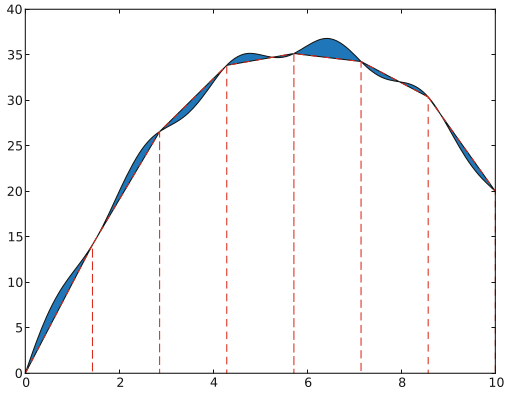

El método del trapecio nos permite calcular numéricamente el valor de una integral definida en un intervalo $[a,b]$. La idea es aproximar el valor de una integral mediante la siguiente fórmula
$$\int_a^bf(x)d(x)\approx \sum_{i=1}^{n-1}\frac{1}{2}h(f(x_i)+f(x_{i+1})),$$ donde $h$ es el ancho cada uno de los trapecios, $h=(b-a)/n$ y $x_i=a+ih$, $i=0,\ldots,n$ son las coordenadas de los lados de los trapecios. La figura de abajo muestra la idea de la regla del trapecio.

¿Cuál es el valor de las siguientes integrales?
1. $$\int_0^1e^{-x^2}dx$$

2. $$\int_0^1\arctan(e^{x})dx$$

3. $$\int_0^{\pi}\cos(e^{-x})dx$$

**Algoritmo: método del trapecio**

Implementación del método del trapecio.
**Entrada:** límite inferior $a$, límite superior $b$, función $f$ y número de trapezoides $n$. **Salida:** Valor de la integral de $f(x)$ en $[a,b]$.

1.   Definir $a$, $b$ y $n$.
2.   Calcular el paso $h=(b-a)/n$.
3.   Para $i=1$ hasta $i=n-1$:
     1. Calcular $x_i=a+ih$.
     2. Calcular $x_{i+1}=a+(i+1)h$.
     3. Sumar $\frac{1}{2}h\left(f(x_i) + f(x_{i+1})\right)$ al valor de la integral.
4.   Imprimir el valor de la integral.



1. $$\int_0^1e^{-x^2}dx$$

#### **Código:**

In [1]:
# Numerical integration
# Author: José Alfredo de León 
# Date: 27.10.2020
#
# Program's description:
# Implementation of trapezoidal rule. 

import math as m               # math functions

# 1. Definitions
a = 0                          # lower limit
b = 1                          # lower limit
n = 100                        # number of trapezoids

# 2. Calculate the step h
h = (b - a)/n                  

# 3. Trapezoidal rule's formula
integral = 0                   # initialization of integral value
for i in range(1, n):
  xi1 = a + i*h                # x_i
  xi2 = a + (i + 1)*h          # x_{i+1}
  integral = integral + \
            (1/2)*h*(m.exp(-xi1**2) + \
             m.exp(-xi2**2))   # sum every term
            
# 4. Print integral value            
print('Integral = ' + str(integral))

Integral = 0.7368185014429707


2. $$\int_0^1\arctan(e^{x})dx$$

In [2]:
# Numerical integration
# Author: José Alfredo de León 
# Date: 27.10.2020
#
# Implementation of trapezoidal rule. 

import math as m               # math functions

# 1. Definitions
a = 0                          # lower limit
b = 1                          # lower limit
n = 100                        # number of trapezoids

# 2. Calculate the step h
h = (b - a)/n                  

# 3. Trapezoidal rule
integral = 0                   # initialization of integral value
for i in range(1, n):
  xi1 = a + i*h                # x_i
  xi2 = a + (i + 1)*h          # x_{i+1}
  integral = integral + \
            (1/2)*h*(m.atan(m.exp(xi1)) + \
             m.atan(m.exp(xi2)))   # sum every term
            
# 4. Print integral value            
print('Integral = ' + str(integral))

Integral = 1.0095501353739071


3. $$\int_0^{\pi}\cos(e^{-x})dx$$

In [7]:
# Numerical integration
# Author: José Alfredo de León 
# Date: 27.10.2020
#
# Implementation of trapezoidal rule. 

import math as m               # math functions

# 1. Definitions
a = 0                          # lower limit
b = m.pi                       # lower limit
n = 100                        # number of trapezoids

# 2. Calculate the step h
h = (b - a)/n                  

# 3. Trapezoidal rule
integral = 0                   # initialization of integral value
for i in range(1, n):
  xi1 = a + i*h                # x_i
  xi2 = a + (i + 1)*h          # x_{i+1}
  integral = integral + \
            (1/2)*h*(m.cos(m.exp(-xi1)) + \
             m.cos(m.exp(-xi2)))   # sum every term
            
# 4. Print integral value            
print('Integral = ' + str(integral))

Integral = 2.8847999154090447


### **Algoritmo: método del trapecio 2.0**

#### **No obstante, ¿cómo aseguramos que la respuesta de la integral tenga alguna presición deseada?**

Un problema con esta implementación es que no tenemos cómo decidir cuántos trapecios son necesarios para alcanzar alguna precisión deseada. Veamos a continuación una solución.

Sea $E$ el error en el método del trapecio. Es decir, $E$ es la diferencia entre el valor exacto de la integral y el valor cálculado utilizando el método. El objetivo es ajustar la tolerancia $\epsilon$ y encontrar el número de trapecios $n$ tal que $E\leq\epsilon$. Según la literatura

$$E\leq \frac{1}{12}(b-a)h^2\max_{x\in \left[ a,b\right] } \lvert f''(x)\rvert.$$
El valor de $f''(x)$ se puede aproximar con la siguiente fórmula de diferencias finitas:
$$f''(x)\approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2}.$$

Igualando el lado derecho de la desigualdad para $E$ a $\epsilon$ y despejando para $h$ se tiene
$$h=\sqrt{12\epsilon} \left( (b-a)\max_{x\in \left[ a,b\right] } \lvert f''(x)\rvert\right)^{-1/2}.$$
Con $n=(b-a)/h$ el número de trapezoides adecuado para alcanzar la precisión $\epsilon$ deseada.

Ahora toca implementar este procedimiento y agregarlo al programa que ya tenemos.

Implementación del método del trapecio considerando tolerencia máxima $\epsilon$.
**Entrada:** límite inferior $a$, límite superior $b$, función $f$, número $n$ para particionar $[a,b]$ y encontrar el máximo de $f''(x)$ y tolerancia $\epsilon$. **Salida:** Valor de la integral de $f(x)$ en $[a,b]$.

1.   Definir $a$, $b$, n y $\epsilon$.
2.   Para $i=0$ hasta $i=n$ hacer:
     1. Calcular $x=a+ih$
     2. Calcular $\frac{f(x+h)-2f(x)+f(x-h)}{h^2}$
     3. Guardar el resultado anterior
3. Encontrar el máximo valor de la segunda derivada en $[a,b]$.
2.   Calcular el paso $$h=\sqrt{12\epsilon} \left( (b-a)\max_{x\in \left[ a,b\right] } \lvert f''(x)\rvert\right)^{-1/2}.$$
3.   Para $i=1$ hasta $i=n-1$ hacer:
     1. Calcular $x_i=a+ih$.
     2. Calcular $x_{i+1}=a+(i+1)h$.
     3. Sumar $\frac{1}{2}h\left(f(x_i) + f(x_{i+1})\right)$ al valor de la integral.
4.   Imprimir el valor de la integral.

#### **Código:**

In [8]:
# Numerical integration 2.0
# Author: José Alfredo de León 
# Date: 10,11.2020
#
# Implementation of trapezoidal rule considering tolerance. 

import math as m               # math functions

# 1. Definitions
a = 0                          # lower limit
b = 1                          # lower limit
n = 100                        # number of partitions of [a,b]
tol = 1E-15                    # tolerance

h = (b-a)/n                    # step to calculate f''(x) in [a,b]

# 2. Compute second derivative in [a,b]
sndD = []                      # list to store num. values of f''(x)           
for i in range(0, n+1):
  x = a + i*h
  sndD.append(abs((m.atan(m.exp(x + h))\
                   - 2*m.atan(m.exp(x))\
                   + m.atan(m.exp(x - h)))\
                   /(h**2)))

# 3. Find maximum value of step 2
maxSndD = max(sndD)

# 4. Compute step h with the formula
h = m.sqrt(12*(tol))*((b-a)*maxSndD)**(-1/2)
n = int((b - a)/h)

# 5. Trapezoidal rule
integral = 0                   # initialization of integral value
for i in range(1, n):
  xi1 = a + i*h                # x_i
  xi2 = a + (i + 1)*h          # x_{i+1}
  integral = integral + \
            (1/2)*h*(m.atan(m.exp(xi1)) + \
             m.atan(m.exp(xi2)))   # sum every term
            
# 6. Print integral value            
print('Integral = ' + str(integral))

Integral = 1.0174303606315682


**Limitación:** en términos prácticos es fastidioso tener que estar modificando líneas de código para colocar la función que deseamos. Sería conveniente tener una forma más práctica de modificarlo. En una de las siguientes clases veremos cómo crear funciones de Python y resolver este problema.

## **Tarea:**

Del capítulo 2 del libro "A primer on Scientific Programming with Python"
ejercicios 2.11, 2.13 y 2.16.